# Tonnetz: Cellular Automaton Chord Engine Demo

This notebook demonstrates the capabilities of the Tonnetz library, which combines neo-Riemannian music theory with cellular automaton dynamics to create evolving chord progressions on a toroidal lattice.

## Overview

The Tonnetz library provides:
- **Chord Representation**: Rich chord objects with pitch classes, qualities, and transformations
- **Neo-Riemannian Theory**: PLR (Parallel, Leittonwechsel, Relative) transformations
- **Toroidal Geometry**: Spatial arrangement of chords on a torus
- **Progression Algorithms**: Rule-based, Markov, and search-driven chord generation
- **Cellular Automaton**: 2D grid evolution with local transformation rules
- **Visualization**: Static and interactive plots of harmonic evolution

Let's explore each component step by step!

In [2]:
# Import core Tonnetz components
from tonnetz.core.chord import Chord, parse_chord_name, CommonChords
from tonnetz.core.neo_riemannian import (
    PLRGroup,
    parallel,
    relative,
    leading_tone_exchange,
)
from tonnetz.core.tonnetz import ToroidalTonnetz
from tonnetz.automaton.grid import ToroidalGrid
from tonnetz.automaton.cell import Cell
from tonnetz.progression.rule_based import RuleBasedProgression
from tonnetz.visualization.static import TonnetzPlotter, plot_grid, plot_progression

# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List

# Set up matplotlib for inline plotting
%matplotlib inline
plt.style.use("default")

print("Tonnetz library imported successfully!")
print("Ready to explore harmonic cellular automata...")

Tonnetz library imported successfully!
Ready to explore harmonic cellular automata...


## 1. Basic Chord Operations

Let's start by exploring the fundamental chord representation and operations.

In [3]:
# Create some basic chords
c_major = Chord(root=0, quality="major")
f_minor = Chord(root=5, quality="minor")
g7 = Chord(root=7, quality="dominant7")

print("=== Basic Chord Creation ===")
print(f"C major: {c_major}")
print(f"F minor: {f_minor}")
print(f"G7: {g7}")
print()

# Parse chords from string names
try:
    am = parse_chord_name("Am")
    fsharp_dim = parse_chord_name("F#dim")
    bb_maj7 = parse_chord_name("Bbmaj7")

    print("=== Chord Name Parsing ===")
    print(f"'Am' -> {am}")
    print(f"'F#dim' -> {fsharp_dim}")
    print(f"'Bbmaj7' -> {bb_maj7}")
    print()
except ValueError as e:
    print(f"Parsing error: {e}")

# Examine pitch classes
print("=== Pitch Classes ===")
print(f"C major pitch classes: {c_major.pitch_classes()}")
print(f"F minor pitch classes: {f_minor.pitch_classes()}")
print(f"G7 pitch classes: {g7.pitch_classes()}")
print()

# Chord transformations
print("=== Transposition ===")
c_major_up_fifth = c_major.transpose(7)
print(f"C major + 7 semitones: {c_major_up_fifth}")

c_major_down_third = c_major.transpose(-4)
print(f"C major - 4 semitones: {c_major_down_third}")
print()

# Voice leading distance
print("=== Voice Leading Analysis ===")
distance_c_to_f = c_major.voice_leading_distance(f_minor)
distance_c_to_g = c_major.voice_leading_distance(g7)
print(f"C major -> F minor: {distance_c_to_f:.1f} semitones")
print(f"C major -> G7: {distance_c_to_g:.1f} semitones")

=== Basic Chord Creation ===
C major: C
F minor: Fm
G7: G7

=== Chord Name Parsing ===
'Am' -> Am
'F#dim' -> F#dim
'Bbmaj7' -> A#maj7

=== Pitch Classes ===
C major pitch classes: (0, 4, 7)
F minor pitch classes: (5, 8, 0)
G7 pitch classes: (7, 11, 2, 5)

=== Transposition ===
C major + 7 semitones: G
C major - 4 semitones: G#

=== Voice Leading Analysis ===
C major -> F minor: 2.0 semitones
C major -> G7: 4.0 semitones


## 2. Neo-Riemannian Transformations

The PLR group provides three fundamental transformations that preserve two common tones between triads:
- **P (Parallel)**: Changes mode while keeping root and fifth
- **L (Leittonwechsel)**: Leading-tone exchange
- **R (Relative)**: Relative major/minor transformation

In [4]:
# Create PLR group for transformations
plr = PLRGroup()

# Start with C major
start_chord = Chord(0, "major")
print(f"Starting chord: {start_chord}")
print()

# Apply individual transformations
print("=== Individual PLR Transformations ===")
p_chord = plr.parallel(start_chord)
l_chord = plr.leading_tone_exchange(start_chord)
r_chord = plr.relative(start_chord)

print(f"P(C) = {p_chord}  (parallel - changes mode)")
print(f"L(C) = {l_chord}  (leading-tone exchange)")
print(f"R(C) = {r_chord}  (relative minor)")
print()

# Compose transformations
print("=== Composed Transformations ===")
plr_chord = plr.apply("PLR", start_chord)
lpr_chord = plr.apply("LPR", start_chord)
print(f"PLR(C) = {plr_chord}")
print(f"LPR(C) = {lpr_chord}")
print()

# Find transformation sequences between chords
print("=== Finding Transformation Paths ===")
target1 = Chord(9, "minor")  # A minor
target2 = Chord(4, "major")  # E major

path1 = plr.find_transformation_sequence(start_chord, target1)
path2 = plr.find_transformation_sequence(start_chord, target2)

print(f"C major -> A minor: {path1 if path1 else 'No path found'}")
print(f"C major -> E major: {path2 if path2 else 'No path found'}")
print()

# Explore PLR orbit (all reachable chords)
print("=== PLR Orbit Exploration ===")
orbit = plr.get_orbit(start_chord, max_steps=3)
print(f"Chords reachable from C major in 3 PLR steps: {len(orbit)}")
for i, chord in enumerate(sorted(orbit, key=lambda c: (c.root, c.quality))):
    if i < 8:  # Show first 8
        print(f"  {chord}")
    elif i == 8:
        print(f"  ... and {len(orbit) - 8} more")

Starting chord: C

=== Individual PLR Transformations ===
P(C) = Cm  (parallel - changes mode)
L(C) = D#m  (leading-tone exchange)
R(C) = Am  (relative minor)

=== Composed Transformations ===
PLR(C) = F#m
LPR(C) = Cm

=== Finding Transformation Paths ===
C major -> A minor: R
C major -> E major: No path found

=== PLR Orbit Exploration ===
Chords reachable from C major in 3 PLR steps: 8
  C
  Cm
  D#
  D#m
  F#
  F#m
  A
  Am


## 3. Tonnetz Geometry

The Tonnetz maps chords onto a 2D toroidal lattice where spatial proximity reflects harmonic relationships.

In [5]:
# Create a Tonnetz lattice
tonnetz = ToroidalTonnetz(width=12, height=12)

# Map chords to coordinates
chords_to_map = [
    Chord(0, "major"),  # C major
    Chord(7, "major"),  # G major
    Chord(5, "major"),  # F major
    Chord(9, "minor"),  # A minor
]

print("=== Chord Coordinate Mapping ===")
for chord in chords_to_map:
    coords = tonnetz.chord_to_coords(chord)
    print(f"{chord} -> coordinates {coords}")

print()

# Calculate distances on the torus
print("=== Tonnetz Distances ===")
c_coords = tonnetz.chord_to_coords(Chord(0, "major"))
g_coords = tonnetz.chord_to_coords(Chord(7, "major"))
distance = tonnetz.toroidal_distance(c_coords, g_coords)
print(f"Distance between C major and G major: {distance:.2f}")

# Harmonic distance vs geometric distance
c_maj = Chord(0, "major")
g_maj = Chord(7, "major")
harmonic_dist = tonnetz.chord_distance(c_maj, g_maj)
voice_leading_dist = c_maj.voice_leading_distance(g_maj)

print(f"Geometric distance: {harmonic_dist:.2f}")
print(f"Voice leading distance: {voice_leading_dist:.2f}")
print()

# Explore neighborhoods
print("=== Chord Neighborhoods ===")
c_major = Chord(0, "major")
neighbors = tonnetz.get_chord_neighbors(c_major)
print(f"Neighbors of {c_major}:")
for i, neighbor in enumerate(neighbors[:6]):  # Show first 6
    print(f"  {neighbor}")
if len(neighbors) > 6:
    print(f"  ... and {len(neighbors) - 6} more")

=== Chord Coordinate Mapping ===
C -> coordinates (0, 0)
G -> coordinates (1, 4)
F -> coordinates (11, 8)
Am -> coordinates (3, 0)

=== Tonnetz Distances ===
Distance between C major and G major: 5.00
Geometric distance: 5.00
Voice leading distance: 3.00

=== Chord Neighborhoods ===
Neighbors of C:
  C#
  F
  A
  G#
  E
  D#
  ... and 2 more


## 4. Chord Progression Algorithms

The library provides several algorithms for generating chord progressions based on different approaches.

In [6]:
# Rule-based progression in C major
rule_algo = RuleBasedProgression(key=0, mode="major")
start_chord = Chord(0, "major")

print("=== Rule-Based Progressions ===")

# Generate a basic functional progression
basic_progression = rule_algo.generate(start_chord, 8)
print("Basic functional progression:")
for i, chord in enumerate(basic_progression):
    print(f"  {i + 1}: {chord}")
print()

# Try different patterns
patterns = ["ii-V-I", "vi-IV-V-I", "circle_of_fifths"]
for pattern in patterns:
    rule_algo.set_parameters(pattern=pattern)
    progression = rule_algo.generate(start_chord, 6)
    print(f"{pattern} progression:")
    print("  " + " -> ".join(str(chord) for chord in progression))
print()

# Different keys and modes
print("=== Different Keys and Modes ===")
keys_and_modes = [
    (0, "major", "C major"),
    (9, "minor", "A minor"),
    (7, "major", "G major"),
    (2, "minor", "D minor"),
]

for key, mode, name in keys_and_modes:
    algo = RuleBasedProgression(key=key, mode=mode, pattern="ii-V-I")
    root_chord = Chord(key, "major" if mode == "major" else "minor")
    progression = algo.generate(root_chord, 3)
    print(f"{name}: {' -> '.join(str(chord) for chord in progression)}")

print()

# Analyze a progression
print("=== Progression Analysis ===")
from tonnetz.progression.base import ProgressionAnalyzer

sample_progression = [
    Chord(0, "major"),  # C
    Chord(9, "minor"),  # Am
    Chord(5, "major"),  # F
    Chord(7, "major"),  # G
]

voice_leading = ProgressionAnalyzer.analyze_voice_leading(sample_progression)
harmonic_rhythm = ProgressionAnalyzer.analyze_harmonic_rhythm(sample_progression)

print(f"Average voice leading distance: {voice_leading['average_distance']:.2f}")
print(f"Total unique chords: {harmonic_rhythm['unique_chords']}")
print(f"Quality distribution: {harmonic_rhythm['quality_distribution']}")

=== Rule-Based Progressions ===
Basic functional progression:
  1: C
  2: C
  3: G
  4: Em
  5: F
  6: Bdim
  7: Em
  8: F

ii-V-I progression:
  C -> Dm -> G -> Cm -> Dm -> G
vi-IV-V-I progression:
  C -> Am -> F -> G -> C -> Am
circle_of_fifths progression:
  C -> C -> Gm -> Dm -> Am -> Em

=== Different Keys and Modes ===
C major: C -> Dm -> G
A minor: Am -> Bdim -> E
G major: G -> Am -> D
D minor: Dm -> Edim -> A

=== Progression Analysis ===
Average voice leading distance: 3.00
Total unique chords: 4
Quality distribution: {'major': 3, 'minor': 1}


## 5. Cellular Automaton Setup

Now let's create a cellular automaton grid and explore how chords evolve through local interactions.

In [7]:
# Create a cellular automaton grid
grid = ToroidalGrid(width=8, height=8, neighborhood="moore", update_mode="synchronous")

print(f"Created grid: {grid.width}x{grid.height}")
print(f"Neighborhood: {grid.neighborhood}")
print(f"Update mode: {grid.update_mode}")
print(f"Total cells: {grid.width * grid.height}")
print()

# Different ways to populate the grid
print("=== Grid Population Methods ===")

# Method 1: Random population
grid.populate_random()
print("1. Random population completed")

# Method 2: Pattern-based population
chords = [Chord(0, "major"), Chord(7, "major"), Chord(5, "major")]
grid.populate_pattern("checkerboard", chords)
print("2. Checkerboard pattern with C-G-F major chords")

# Method 3: Progression-based population
progression_algo = RuleBasedProgression(key=0, mode="major")
start_chord = Chord(0, "major")
grid.populate_with_progression(progression_algo, start_chord)
print("3. Progression-based population completed")
print()

# Examine grid state
print("=== Initial Grid Analysis ===")
stats = grid.get_statistics()
print(f"Generation: {stats['generation']}")
print(f"Total cells: {stats['total_cells']}")
print(f"Active cells: {stats['active_cells']}")
print(f"Average activation: {stats['average_activation']:.3f}")
print()

# Sample some cells
print("Sample of grid contents:")
for y in range(min(3, grid.height)):
    row_chords = []
    for x in range(min(4, grid.width)):
        cell = grid.get_cell(x, y)
        row_chords.append(str(cell.chord))
    print(f"Row {y}: {' | '.join(row_chords)}")
if grid.height > 3:
    print("...")

Created grid: 8x8
Neighborhood: moore
Update mode: synchronous
Total cells: 64

=== Grid Population Methods ===
1. Random population completed
2. Checkerboard pattern with C-G-F major chords
3. Progression-based population completed

=== Initial Grid Analysis ===
Generation: 0
Total cells: 64
Active cells: 0
Average activation: 0.000

Sample of grid contents:
Row 0: C | F | Bdim | Em
Row 1: Am | F | Bdim | Em
Row 2: Bdim | Em | F | Bdim
...


## 6. Cellular Automaton Evolution

Let's define custom rules and watch how the chord patterns evolve over time.

In [8]:
# Define custom evolution rules
def majority_rule(cell, neighbors):
    """Simple majority vote rule."""
    if not neighbors:
        return cell.chord

    # Count chord occurrences
    chord_counts = {}
    for neighbor in neighbors:
        chord = neighbor.chord
        chord_counts[chord] = chord_counts.get(chord, 0) + 1

    # Return most common chord
    max_count = max(chord_counts.values())
    candidates = [chord for chord, count in chord_counts.items() if count == max_count]

    # If current chord is among the most common, keep it (stability bias)
    if cell.chord in candidates:
        return cell.chord
    else:
        return candidates[0]


def harmony_rule(cell, neighbors):
    """Rule that favors harmonic relationships."""
    if not neighbors:
        return cell.chord

    # Calculate harmony with each neighbor chord
    best_chord = cell.chord
    best_harmony = 0

    # Consider current chord and all neighbor chords
    all_chords = [cell.chord] + [n.chord for n in neighbors]

    for candidate in set(all_chords):
        total_harmony = 0
        for neighbor in neighbors:
            # Inverse of voice leading distance = harmony
            distance = candidate.voice_leading_distance(neighbor.chord)
            harmony = 1.0 / (1.0 + distance)
            total_harmony += harmony

        if total_harmony > best_harmony:
            best_harmony = total_harmony
            best_chord = candidate

    return best_chord


def plr_rule(cell, neighbors):
    """Rule that applies PLR transformations based on neighbor influence."""
    if not neighbors:
        return cell.chord

    # Count different chord types in neighborhood
    major_count = sum(1 for n in neighbors if n.chord.quality == "major")
    minor_count = sum(1 for n in neighbors if n.chord.quality == "minor")

    # Apply PLR transformation based on neighborhood
    plr = PLRGroup()

    if major_count > minor_count and cell.chord.quality == "minor":
        # Surrounded by major chords, try to become major
        return plr.parallel(cell.chord)
    elif minor_count > major_count and cell.chord.quality == "major":
        # Surrounded by minor chords, try to become minor
        return plr.parallel(cell.chord)
    else:
        # Stable state or mixed neighborhood
        return cell.chord


# Test different rules
print("=== Testing Evolution Rules ===")

# Reset grid for testing
grid.populate_pattern("checkerboard", [Chord(0, "major"), Chord(9, "minor")])
print("Initial pattern: checkerboard of C major and A minor")

rules_to_test = [
    ("Majority Rule", majority_rule),
    ("Harmony Rule", harmony_rule),
    ("PLR Rule", plr_rule),
]

for rule_name, rule_func in rules_to_test:
    # Reset to same initial state
    grid.populate_pattern("checkerboard", [Chord(0, "major"), Chord(9, "minor")])

    print(f"\n--- {rule_name} Evolution ---")
    print(f"Generation 0: {grid.stats['chord_changes']} changes")

    # Run 5 steps
    for step in range(1, 6):
        grid.update(rule_func)
        stats = grid.get_statistics()
        print(
            f"Generation {step}: {stats['chord_changes']} changes, "
            f"harmony: {stats['harmony_level']:.3f}"
        )

    # Sample final state
    print("Final sample (top-left 3x3):")
    for y in range(min(3, grid.height)):
        row = []
        for x in range(min(3, grid.width)):
            cell = grid.get_cell(x, y)
            row.append(str(cell.chord)[:2])  # Abbreviated
        print("  " + " ".join(f"{c:>3}" for c in row))

=== Testing Evolution Rules ===
Initial pattern: checkerboard of C major and A minor

--- Majority Rule Evolution ---
Generation 0: 0 changes
Generation 1: 0 changes, harmony: 0.905
Generation 2: 0 changes, harmony: 0.905
Generation 3: 0 changes, harmony: 0.905
Generation 4: 0 changes, harmony: 0.905
Generation 5: 0 changes, harmony: 0.905
Final sample (top-left 3x3):
    C  Am   C
   Am   C  Am
    C  Am   C

--- Harmony Rule Evolution ---
Generation 0: 0 changes
Generation 1: 32 changes, harmony: 1.000
Generation 2: 0 changes, harmony: 1.000
Generation 3: 0 changes, harmony: 1.000
Generation 4: 0 changes, harmony: 1.000
Generation 5: 0 changes, harmony: 1.000
Final sample (top-left 3x3):
    C   C   C
    C   C   C
    C   C   C

--- PLR Rule Evolution ---
Generation 0: 0 changes
Generation 1: 0 changes, harmony: 0.905
Generation 2: 0 changes, harmony: 0.905
Generation 3: 0 changes, harmony: 0.905
Generation 4: 0 changes, harmony: 0.905
Generation 5: 0 changes, harmony: 0.905
Final s

## 7. Visualization

Let's visualize the grid evolution and chord progressions using the built-in plotting capabilities.

Generating visualizations...


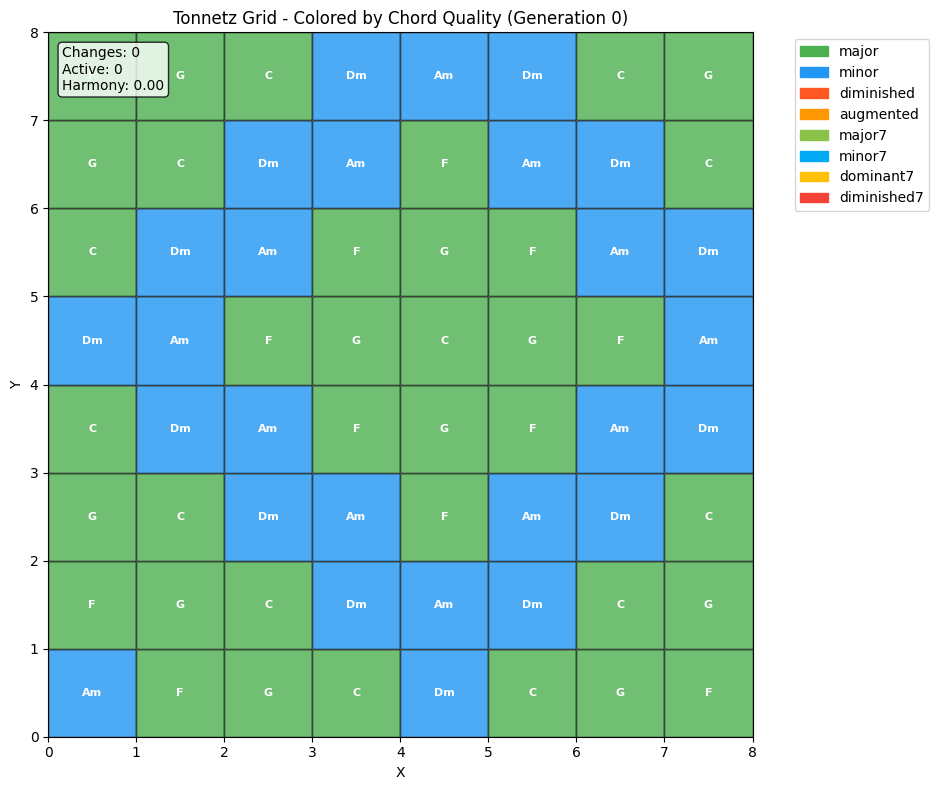

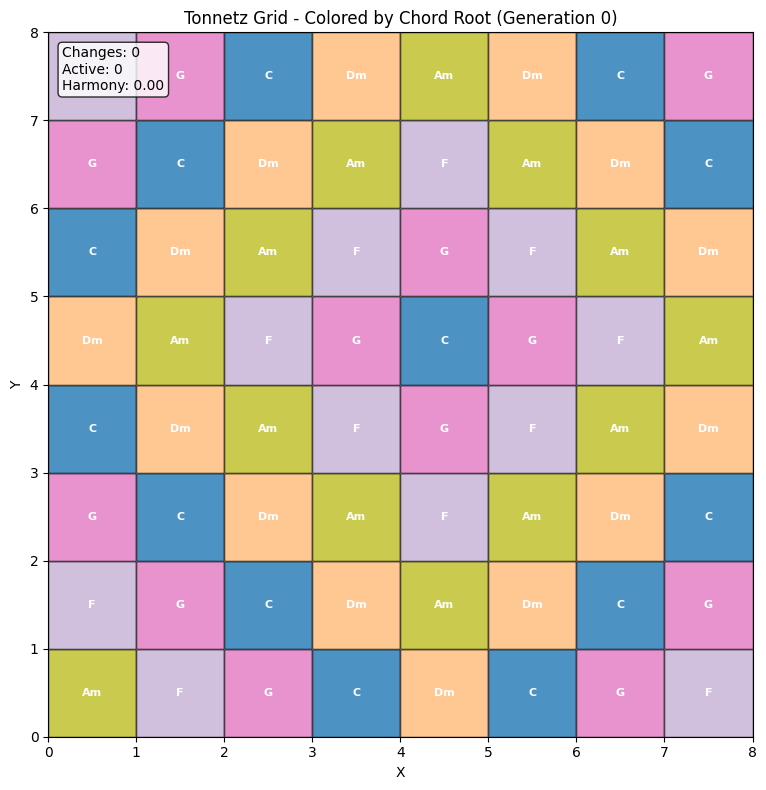

Grid visualizations displayed!

Legend:
- Green: Major chords
- Blue: Minor chords
- Orange/Red: Diminished/Augmented chords


In [9]:
# Create a fresh grid for visualization
viz_grid = ToroidalGrid(width=8, height=8)
viz_grid.populate_pattern(
    "center",
    [
        Chord(0, "major"),  # C major (center)
        Chord(7, "major"),  # G major
        Chord(5, "major"),  # F major
        Chord(9, "minor"),  # A minor
        Chord(2, "minor"),  # D minor
    ],
)

# Create plotter
plotter = TonnetzPlotter(figsize=(10, 8))

print("Generating visualizations...")

# Plot 1: Grid colored by chord quality
fig1 = plotter.plot_grid(
    viz_grid,
    title="Tonnetz Grid - Colored by Chord Quality",
    color_by="quality",
    show=True,
)

# Plot 2: Grid colored by chord root
fig2 = plotter.plot_grid(
    viz_grid, title="Tonnetz Grid - Colored by Chord Root", color_by="root", show=True
)

print("Grid visualizations displayed!")
print("\nLegend:")
print("- Green: Major chords")
print("- Blue: Minor chords")
print("- Orange/Red: Diminished/Augmented chords")


Visualizing: ii-V-I in C major


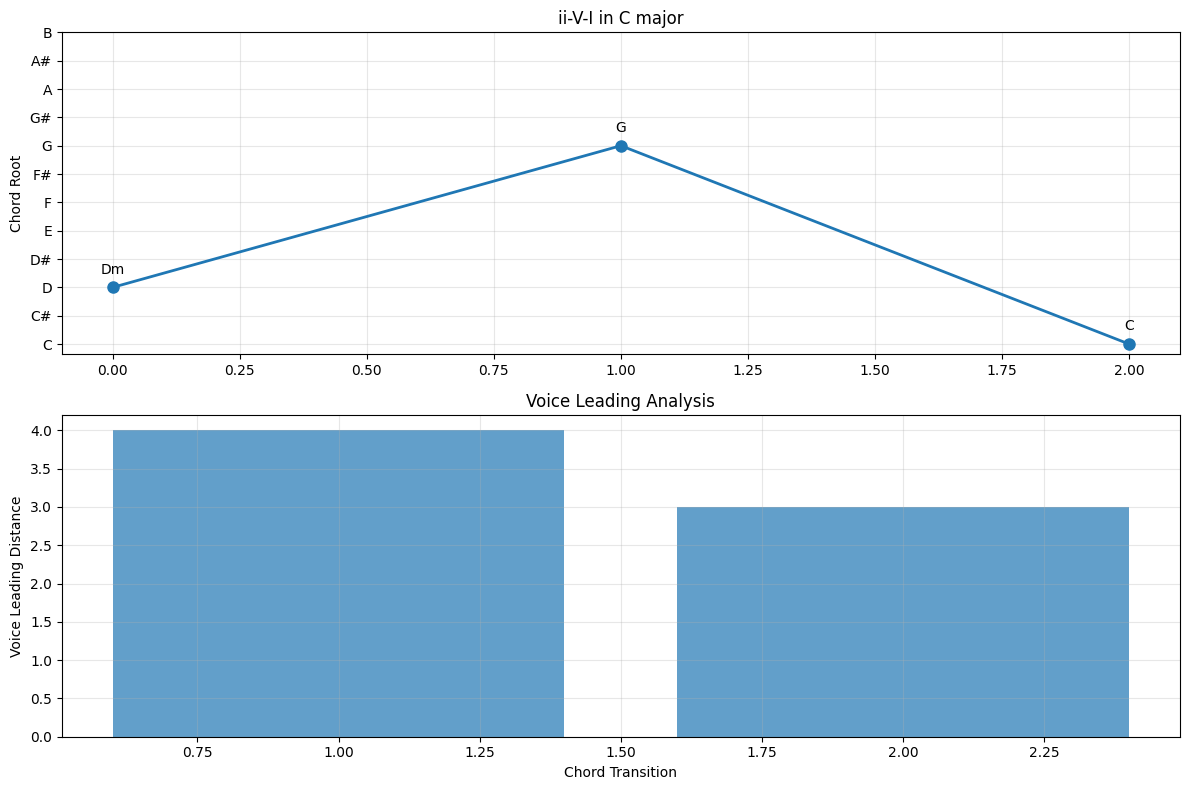

Progression: Dm -> G -> C
Average voice leading distance: 3.50

Visualizing: vi-IV-V-I progression


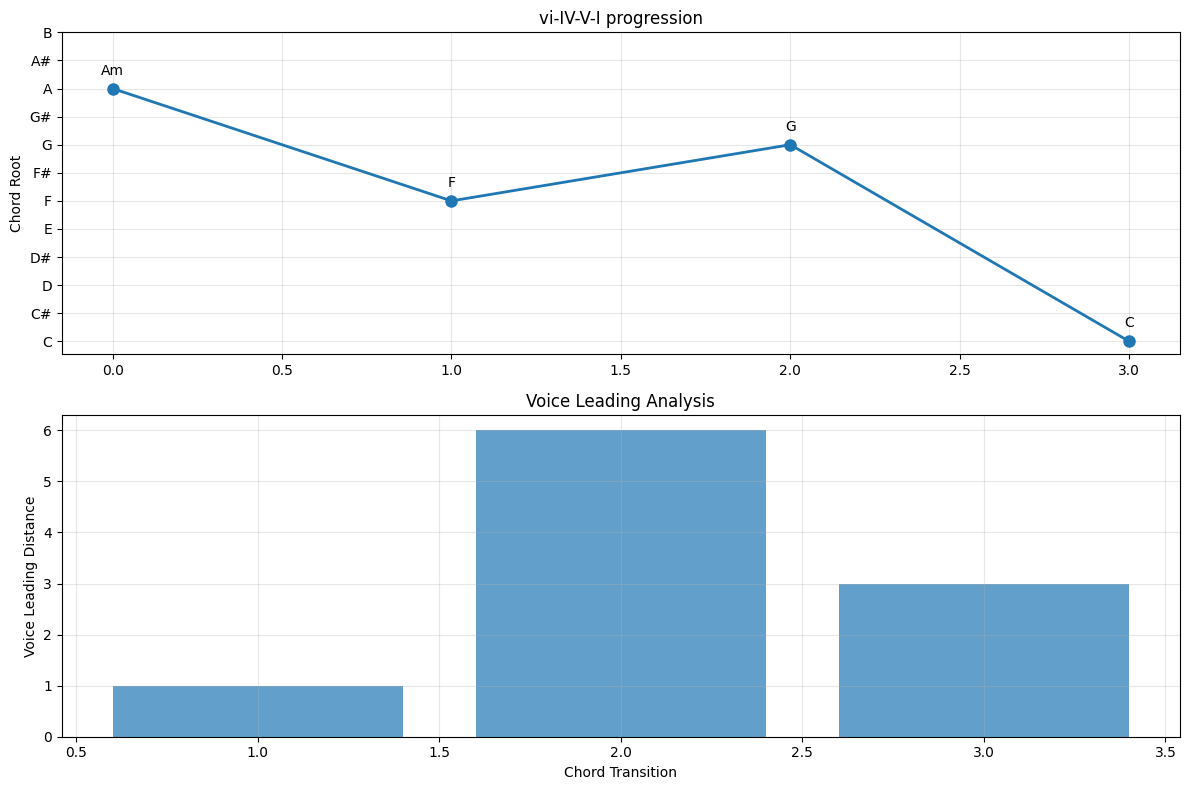

Progression: Am -> F -> G -> C
Average voice leading distance: 3.33

Visualizing: Circle of fifths


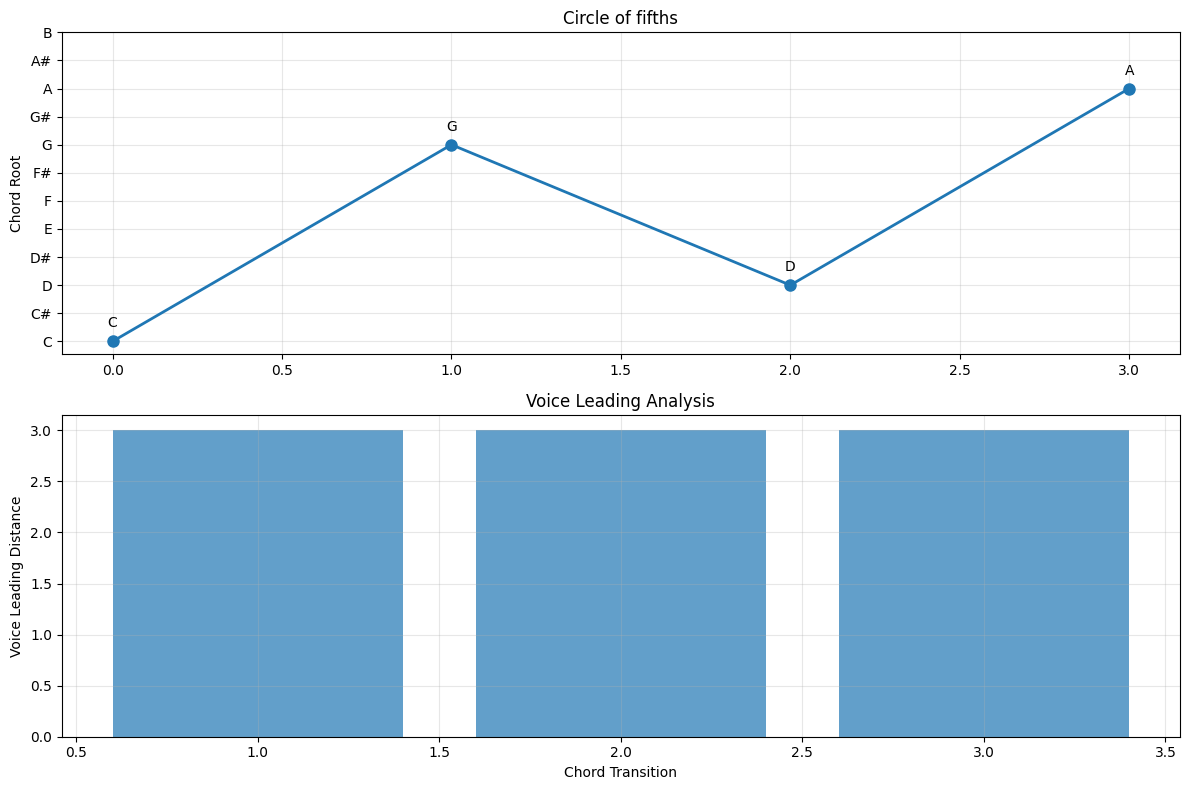

Progression: C -> G -> D -> A
Average voice leading distance: 3.00

Progression visualizations completed!


In [10]:
# Visualize chord progressions
progression_examples = [
    ("ii-V-I in C major", [Chord(2, "minor"), Chord(7, "major"), Chord(0, "major")]),
    (
        "vi-IV-V-I progression",
        [Chord(9, "minor"), Chord(5, "major"), Chord(7, "major"), Chord(0, "major")],
    ),
    (
        "Circle of fifths",
        [Chord(0, "major"), Chord(7, "major"), Chord(2, "major"), Chord(9, "major")],
    ),
]

for title, progression in progression_examples:
    print(f"\nVisualizing: {title}")
    fig = plotter.plot_progression(progression, title=title, show=True)

    # Print the progression
    print("Progression: " + " -> ".join(str(chord) for chord in progression))

    # Analyze the progression
    from tonnetz.progression.base import ProgressionAnalyzer

    analysis = ProgressionAnalyzer.analyze_voice_leading(progression)
    print(f"Average voice leading distance: {analysis['average_distance']:.2f}")

print("\nProgression visualizations completed!")

## 8. Advanced Features and Analysis

Let's explore some advanced capabilities of the library.

In [11]:
# Pattern detection in evolved grids
analysis_grid = ToroidalGrid(width=6, height=6)
analysis_grid.populate_pattern("stripes", [Chord(0, "major"), Chord(7, "major")])

print("=== Pattern Detection ===")
print("Initial pattern: alternating stripes of C major and G major")

# Evolve the grid
for step in range(3):
    analysis_grid.update(majority_rule)

# Find patterns
patterns = analysis_grid.find_patterns(pattern_size=2)
print(f"Found {len(patterns)} recurring patterns of size 2x2")

if patterns:
    for i, pattern in enumerate(patterns[:2]):  # Show first 2
        print(f"Pattern {i + 1}: {pattern['pattern']}")
        print(f"  Locations: {pattern['locations']}")

print()

# Grid state analysis over time
print("=== Temporal Analysis ===")
temporal_grid = ToroidalGrid(width=5, height=5)
temporal_grid.populate_random()

# Track statistics over multiple generations
generations = []
harmony_levels = []
change_rates = []

for gen in range(10):
    stats = temporal_grid.get_statistics()
    generations.append(gen)
    harmony_levels.append(stats["harmony_level"])
    change_rates.append(stats["chord_changes"])

    if gen < 9:  # Don't update after last measurement
        temporal_grid.update(harmony_rule)

print("Generation | Harmony Level | Changes")
print("-" * 35)
for i in range(len(generations)):
    print(f"{generations[i]:^10} | {harmony_levels[i]:^13.3f} | {change_rates[i]:^7}")

print()

# Export and import functionality
print("=== State Persistence ===")
export_grid = ToroidalGrid(width=4, height=4)
export_grid.populate_pattern("checkerboard", [Chord(0, "major"), Chord(9, "minor")])

# Export state
state_data = export_grid.export_state()
print(f"Exported state contains {len(state_data['cells'])} cells")
print(f"Grid dimensions: {state_data['width']}x{state_data['height']}")

# Create new grid and import state
import_grid = ToroidalGrid(width=2, height=2)  # Different initial size
import_grid.import_state(state_data)
print(f"Imported grid now has dimensions: {import_grid.width}x{import_grid.height}")

# Verify import worked
sample_cell = import_grid.get_cell(0, 0)
print(f"Sample imported cell: {sample_cell.chord}")

print()

# Advanced chord analysis
print("=== Advanced Chord Analysis ===")
test_chords = [
    Chord(0, "major"),  # C major
    Chord(0, "minor"),  # C minor
    Chord(7, "major"),  # G major
    Chord(4, "minor"),  # E minor
]

print("Chord relationship matrix (voice leading distances):")
print("     ", end="")
for chord in test_chords:
    print(f"{str(chord):>6}", end="")
print()

for i, chord1 in enumerate(test_chords):
    print(f"{str(chord1):<4} ", end="")
    for j, chord2 in enumerate(test_chords):
        if i == j:
            print("  0.00", end="")
        else:
            distance = chord1.voice_leading_distance(chord2)
            print(f"{distance:6.2f}", end="")
    print()

print()

# Neo-Riemannian analysis of progressions
print("=== Neo-Riemannian Analysis ===")
sample_progression = [
    Chord(0, "major"),  # C major
    Chord(9, "minor"),  # A minor (R transformation)
    Chord(5, "major"),  # F major
    Chord(2, "minor"),  # D minor
    Chord(7, "major"),  # G major
    Chord(0, "major"),  # C major (return)
]

plr_analysis = ProgressionAnalyzer.analyze_neo_riemannian_moves(sample_progression)
print("PLR transformation analysis:")
for i, transform in enumerate(plr_analysis["transformations"]):
    if transform["transformation"]:
        print(
            f"  {transform['from']} -> {transform['to']}: {transform['transformation']}"
        )
    else:
        print(f"  {transform['from']} -> {transform['to']}: no simple PLR path")

print(f"\nPLR efficiency: {plr_analysis['plr_efficiency']:.2f} (lower is better)")
print(
    f"Direct PLR moves: {plr_analysis['direct_plr_moves']}/{len(sample_progression) - 1}"
)

=== Pattern Detection ===
Initial pattern: alternating stripes of C major and G major
Found 130 recurring patterns of size 2x2
Pattern 1: [[7, 0], [7, 0]]
  Locations: [(0, 0), (0, 1)]
Pattern 2: [[7, 0], [7, 0]]
  Locations: [(0, 0), (2, 1)]

=== Temporal Analysis ===
Generation | Harmony Level | Changes
-----------------------------------
    0      |     0.000     |    0   
    1      |     0.739     |   25   
    2      |     0.790     |   19   
    3      |     0.785     |   14   
    4      |     0.793     |   14   
    5      |     0.801     |   14   
    6      |     0.823     |   11   
    7      |     0.833     |    9   
    8      |     0.861     |    9   
    9      |     0.924     |   10   

=== State Persistence ===
Exported state contains 16 cells
Grid dimensions: 4x4
Imported grid now has dimensions: 4x4
Sample imported cell: C

=== Advanced Chord Analysis ===
Chord relationship matrix (voice leading distances):
          C    Cm     G    Em
C      0.00  1.00  3.00  1.0

## 9. Conclusion and Next Steps

This notebook has demonstrated the core capabilities of the Tonnetz library:

### What We've Covered:
1. **Chord Operations**: Creating, parsing, and manipulating chord objects
2. **Neo-Riemannian Transformations**: PLR group operations and composition
3. **Tonnetz Geometry**: Mapping chords to toroidal coordinates
4. **Progression Algorithms**: Rule-based chord sequence generation  
5. **Cellular Automaton**: Grid setup, population, and evolution rules
6. **Visualization**: Static plots of grids and progressions
7. **Advanced Analysis**: Pattern detection, state persistence, and harmonic analysis

### Potential Applications:
- **Algorithmic Composition**: Generate novel chord progressions through evolution
- **Music Analysis**: Visualize harmonic relationships in existing compositions
- **Interactive Performance**: Real-time chord transformation systems
- **Education**: Explore music theory concepts through visual simulation
- **Research**: Study emergent harmonic behaviors in complex systems

### Next Steps:
- Experiment with different grid sizes and neighborhood types
- Create custom evolution rules based on specific musical styles
- Implement Markov chain and search-based progression algorithms
- Add MIDI export functionality for audio playback
- Develop interactive web visualizations
- Integrate with digital audio workstations (DAWs)

### Command Line Usage:
The library also provides CLI tools for batch processing:

```bash
# Generate a simulation
tonnetz-simulate --config examples/basic_config.yaml --steps 20

# Create static visualizations  
tonnetz-visualize --grid-size 12x12 --algorithm rule_based --output tonnetz.png

# Find PLR transformations
tonnetz transform "C" "Am"
```

Happy exploring with the Tonnetz! 🎵